# Applciation of Sklearn Libraries 



---


### Take a look California Housing data and to machine-learning to predict house-values using demonstrating the used primarily scikit-learna and data science techniques like:

- Visualization to gain insights about the data

- imputation to replace missing values withough altering the statistic data

- label encoding to convert categorical data into numeric categorical data

- One-hot encoding 



---

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

In [2]:
# Fetch Synthetic data from the sklearn

from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
house = os.path.join('Resources','housing.csv')

In [7]:
# Covert the data to Dataframe

housing = pd.read_csv(house)
housing[:5].T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41,21,52,52,52
total_rooms,880,7099,1467,1274,1627
total_bedrooms,129,1106,190,235,280
population,322,2401,496,558,565
households,126,1138,177,219,259
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600,358500,352100,341300,342200
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [8]:
# Get the dataframe info

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> ``total_bed_rooms`` attribute has only 20,433, meaning it has missing\NaN values

---

In [101]:
housing.ocean_proximity.unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [100]:
housing.ocean_proximity.value_counts()

<1H OCEAN     7301
INLAND        5275
NEAR OCEAN    2113
NEAR BAY      1818
ISLAND           5
Name: ocean_proximity, dtype: int64

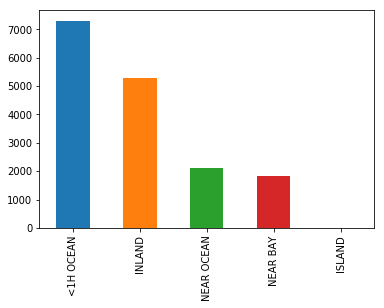

In [105]:
housing.ocean_proximity.value_counts().plot(kind='bar')

> Show the **``unique``** values for the categorical attribute and **``value_counts``** for its corresponding count per value on the dataset

---

In [10]:
# Describe

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> The ** describe()** method shows a statistical summary of the numerical attributes of the data

In [11]:
# Correlation

housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7ec2cdd30>,
      dtype=object)

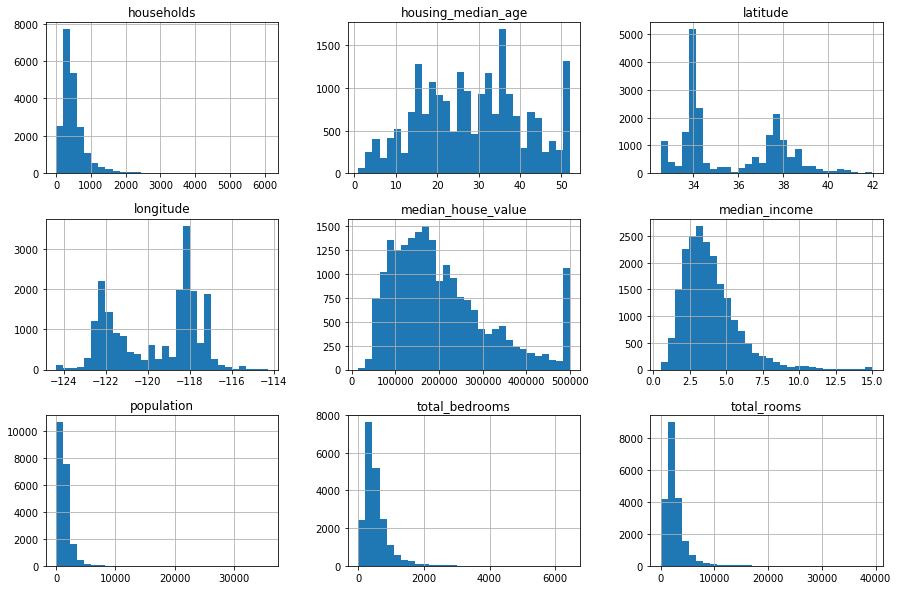

In [12]:
housing.hist(figsize=(15,10), bins=30)

#### Dividing the data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20461,-118.75,34.28,22.0,3844.0,537.0,1665.0,492.0,6.2059,239900.0,<1H OCEAN
9265,-119.81,36.92,14.0,4795.0,710.0,2047.0,640.0,4.6650,121300.0,INLAND
2766,-116.01,33.41,20.0,1996.0,515.0,659.0,295.0,2.8684,62800.0,INLAND
18479,-121.67,37.13,19.0,3269.0,483.0,1383.0,452.0,5.6205,300800.0,<1H OCEAN
6798,-118.14,34.07,52.0,695.0,145.0,523.0,170.0,3.6650,220400.0,<1H OCEAN


In [16]:
train_set.size

165120

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3743,-118.40,34.16,45.0,1176.0,250.0,471.0,228.0,2.3333,364700.0,<1H OCEAN
17212,-119.71,34.43,47.0,1572.0,417.0,790.0,384.0,2.6429,279200.0,<1H OCEAN
14444,-117.26,32.81,25.0,2076.0,586.0,1060.0,554.0,2.8421,227800.0,NEAR OCEAN
15367,-117.20,33.29,12.0,6358.0,1182.0,2778.0,1020.0,4.0357,295900.0,<1H OCEAN
10901,-117.83,33.74,23.0,1818.0,522.0,958.0,485.0,2.6771,131500.0,<1H OCEAN


In [18]:
test_set.size

41280

#### Check the data features

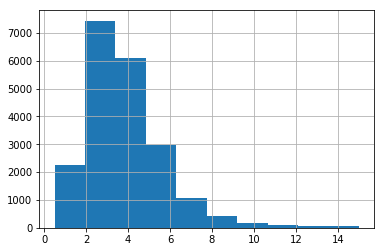

In [19]:
housing['median_income'].hist()

In [20]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


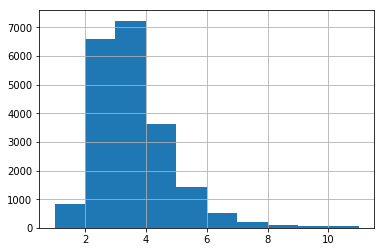

In [22]:
housing['income_cat'].hist()

In [23]:
housing.income_cat.value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [24]:
# Minimize our category to 5, so all income_cat with less than 5 will be aggregated into 5 category
# housing.income_cat.where(housing.income_cat<5, 5.0, inplace=True)

housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

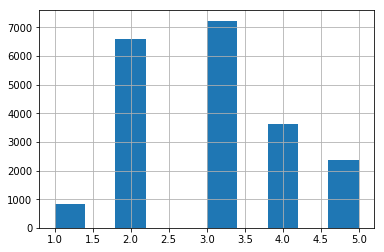

In [25]:
housing.income_cat.hist()

#### Stratified-Shuffled split of Data into Train/Test Split

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [28]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

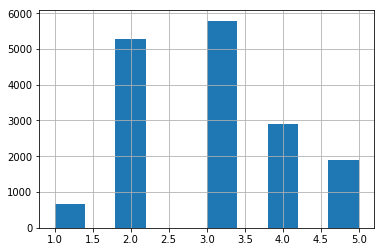

In [29]:
s_train_set['income_cat'].hist()

In [30]:
housing = s_train_set.copy()

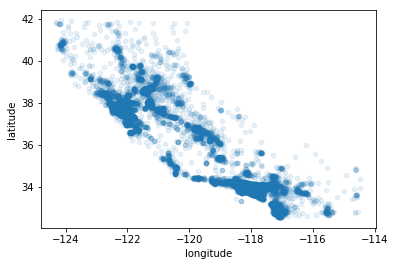

In [31]:
# use alpha parameter to see concentration

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

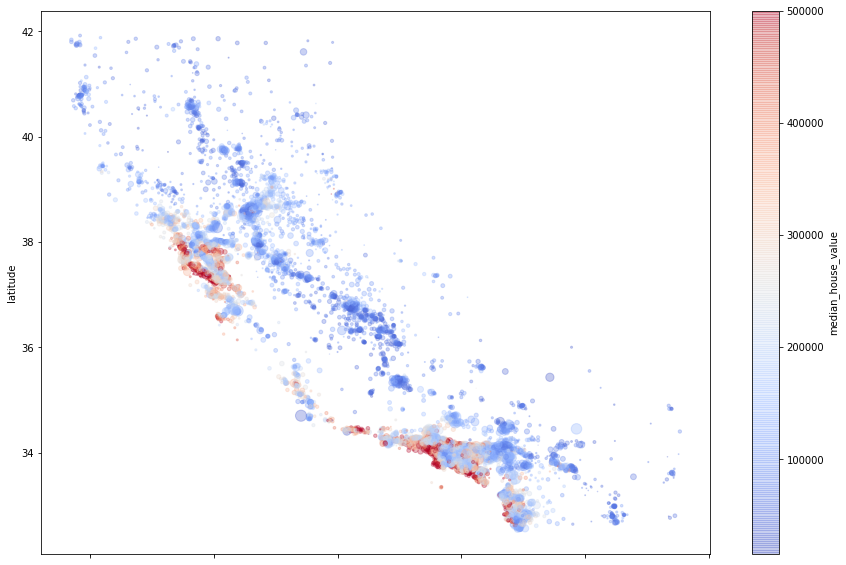

In [32]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
             s=housing['population']/100, c='median_house_value',
            figsize=(15,10), cmap=plt.get_cmap('coolwarm'),
            colorbar=True)

In [33]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.923543,-0.110508,0.046282,0.071090,0.104641,0.058360,-0.011242,-0.041422,-0.007112
latitude,-0.923543,1.000000,0.012798,-0.036668,-0.067807,-0.112606,-0.073253,-0.083813,-0.149478,-0.089535
housing_median_age,-0.110508,0.012798,1.000000,-0.359498,-0.315620,-0.298470,-0.298707,-0.123404,0.101565,-0.152924
total_rooms,0.046282,-0.036668,-0.359498,1.000000,0.929071,0.864008,0.917321,0.196406,0.134256,0.220188
total_bedrooms,0.071090,-0.067807,-0.315620,0.929071,1.000000,0.885198,0.979986,-0.010309,0.049873,0.013501
population,0.104641,-0.112606,-0.298470,0.864008,0.885198,1.000000,0.913655,0.004798,-0.025230,0.026940
households,0.058360,-0.073253,-0.298707,0.917321,0.979986,0.913655,1.000000,0.010377,0.065376,0.036150
median_income,-0.011242,-0.083813,-0.123404,0.196406,-0.010309,0.004798,0.010377,1.000000,0.686344,0.901142
median_house_value,-0.041422,-0.149478,0.101565,0.134256,0.049873,-0.025230,0.065376,0.686344,1.000000,0.642580
income_cat,-0.007112,-0.089535,-0.152924,0.220188,0.013501,0.026940,0.036150,0.901142,0.642580,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7e90221d0>,
      dtype=object)

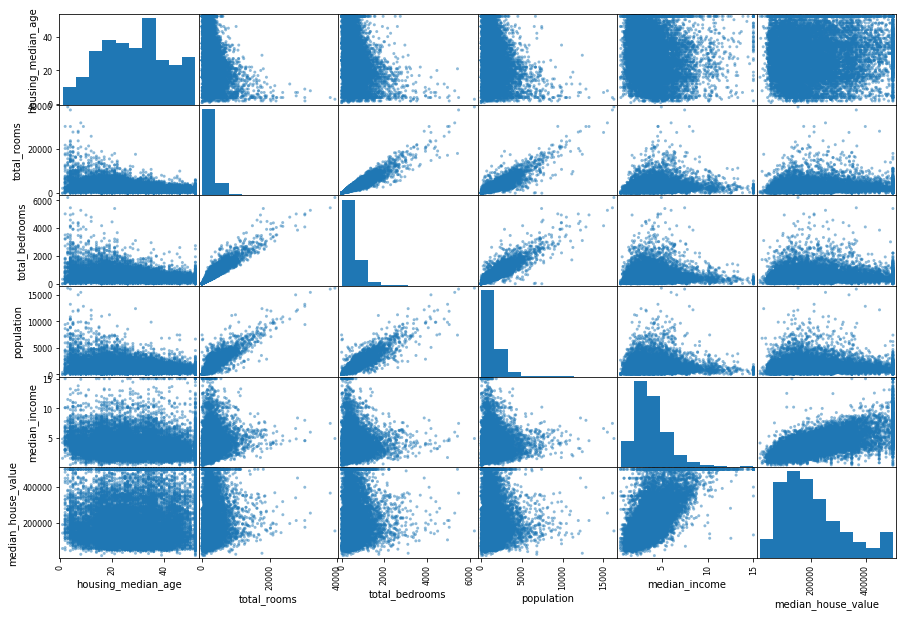

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'total_bedrooms','population', 
                        'median_income', 'median_house_value']],
              figsize=(15,10))

#### Data PreProcessing

#### Using Pandas

In [35]:
# Create a copy of the training data set

housing = s_train_set.copy()

In [36]:
# Drop the target variable from the train set

housing.drop('median_house_value', axis=1, inplace=True)
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1484,-122.05,37.95,20.0,563.0,107.0,246.0,123.0,5.4482,NEAR BAY,4.0
10652,-117.77,33.55,28.0,2024.0,297.0,617.0,274.0,6.7861,<1H OCEAN,5.0
11959,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,INLAND,3.0
4078,-118.36,34.15,41.0,3545.0,698.0,1221.0,651.0,4.3000,<1H OCEAN,3.0
7696,-118.12,33.95,35.0,1604.0,280.0,802.0,280.0,5.7520,<1H OCEAN,4.0


In [37]:
# Create a copy of the target variable of train set

housing_labels = s_train_set['median_house_value'].copy()
housing_labels.tail()

1484     190800.0
10652    499100.0
11959    148700.0
4078     500001.0
7696     291000.0
Name: median_house_value, dtype: float64

In [38]:
# Rows with Null Values on the training dataset - Features

incomplete_rows = housing[housing.isnull().any(axis=1)]
incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN,1.0
7097,-117.98,33.92,27.0,3700.0,NaN,1793.0,552.0,5.3668,<1H OCEAN,4.0
13597,-117.28,34.09,44.0,376.0,NaN,273.0,107.0,2.2917,INLAND,2.0
17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,NEAR OCEAN,3.0
14331,-117.15,32.72,51.0,1321.0,NaN,781.0,499.0,1.3071,NEAR OCEAN,1.0


#### Imputing the NaN Values

In [39]:
# Drop all rows with Null values on total bedrooms
# incomplete_rows.dropna(subset=['total_bedrooms'])

In [40]:
# this is an option to dropt the this featuer
#incomplete_rows.drop('total_bedrooms', axis=1)

In [41]:
# Fill NaN with median values

incomplete_rows['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [42]:
# Print the sample

incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4591,-118.28,34.06,42.0,2472.0,435.0,3795.0,1179.0,1.2254,<1H OCEAN,1.0
7097,-117.98,33.92,27.0,3700.0,435.0,1793.0,552.0,5.3668,<1H OCEAN,4.0
13597,-117.28,34.09,44.0,376.0,435.0,273.0,107.0,2.2917,INLAND,2.0
17202,-119.73,34.44,38.0,1729.0,435.0,801.0,395.0,3.1364,NEAR OCEAN,3.0
14331,-117.15,32.72,51.0,1321.0,435.0,781.0,499.0,1.3071,NEAR OCEAN,1.0


---

#### Using Scikit-Learn

In [43]:
# Import the Scikit Learn Library


from sklearn.impute import SimpleImputer

In [44]:
# Create the imputer

imputer = SimpleImputer(strategy='median')

In [45]:
# Print a preview

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13342,-117.65,34.03,15.0,4420.0,903.0,2373.0,858.0,3.4490,INLAND,3.0
10651,-117.77,33.51,29.0,3590.0,772.0,1070.0,603.0,4.4464,<1H OCEAN,3.0
6556,-118.11,34.19,50.0,1430.0,186.0,620.0,201.0,9.5320,INLAND,5.0
11450,-117.98,33.68,17.0,2603.0,373.0,1265.0,382.0,6.8039,<1H OCEAN,5.0
14821,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,NEAR OCEAN,2.0


In [46]:
# Drop the non-numeric feature from the training set

numeric_housing = housing.drop('ocean_proximity', axis =1)
numeric_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
13342,-117.65,34.03,15.0,4420.0,903.0,2373.0,858.0,3.4490,3.0
10651,-117.77,33.51,29.0,3590.0,772.0,1070.0,603.0,4.4464,3.0
6556,-118.11,34.19,50.0,1430.0,186.0,620.0,201.0,9.5320,5.0
11450,-117.98,33.68,17.0,2603.0,373.0,1265.0,382.0,6.8039,5.0
14821,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,2.0


In [47]:
# apply the imputer to the training set

imputer.fit(numeric_housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [48]:
# Imputer will return statistics

imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.5    ,  435.     ,
       1160.     ,  409.     ,    3.53795,    3.     ])

In [49]:
# Validate that the statistical data from before and after impute are the same

numeric_housing.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.5    ,  435.     ,
       1160.     ,  409.     ,    3.53795,    3.     ])

In [50]:
# Feaures are usually assign to variable X

X = imputer.transform(numeric_housing)
X

array([[-117.65  ,   34.03  ,   15.    , ...,  858.    ,    3.449 ,
           3.    ],
       [-117.77  ,   33.51  ,   29.    , ...,  603.    ,    4.4464,
           3.    ],
       [-118.11  ,   34.19  ,   50.    , ...,  201.    ,    9.532 ,
           5.    ],
       ...,
       [-117.44  ,   33.9   ,   23.    , ...,  778.    ,    4.2788,
           3.    ],
       [-118.36  ,   34.15  ,   41.    , ...,  651.    ,    4.3   ,
           3.    ],
       [-118.12  ,   33.95  ,   35.    , ...,  280.    ,    5.752 ,
           4.    ]])

In [51]:
# To get from the dataframe view after impute

transformed_housing = pd.DataFrame(X, columns=numeric_housing.columns, index=list(housing.index.values))
transformed_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
13342,-117.65,34.03,15.0,4420.0,903.0,2373.0,858.0,3.4490,3.0
10651,-117.77,33.51,29.0,3590.0,772.0,1070.0,603.0,4.4464,3.0
6556,-118.11,34.19,50.0,1430.0,186.0,620.0,201.0,9.5320,5.0
11450,-117.98,33.68,17.0,2603.0,373.0,1265.0,382.0,6.8039,5.0
14821,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,2.0


#### Another Method

In [52]:
# antother method is using the fit_transformed combining both fit and transformed

X = imputer.fit_transform(numeric_housing)
X

array([[-117.65  ,   34.03  ,   15.    , ...,  858.    ,    3.449 ,
           3.    ],
       [-117.77  ,   33.51  ,   29.    , ...,  603.    ,    4.4464,
           3.    ],
       [-118.11  ,   34.19  ,   50.    , ...,  201.    ,    9.532 ,
           5.    ],
       ...,
       [-117.44  ,   33.9   ,   23.    , ...,  778.    ,    4.2788,
           3.    ],
       [-118.36  ,   34.15  ,   41.    , ...,  651.    ,    4.3   ,
           3.    ],
       [-118.12  ,   33.95  ,   35.    , ...,  280.    ,    5.752 ,
           4.    ]])

---

In [53]:
# Check that the Imputer successfully impute the Null values with median value

transformed_housing.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4591,-118.28,34.06,42.0,2472.0,435.0,3795.0,1179.0,1.2254,1.0
7097,-117.98,33.92,27.0,3700.0,435.0,1793.0,552.0,5.3668,4.0
13597,-117.28,34.09,44.0,376.0,435.0,273.0,107.0,2.2917,2.0
17202,-119.73,34.44,38.0,1729.0,435.0,801.0,395.0,3.1364,3.0
14331,-117.15,32.72,51.0,1321.0,435.0,781.0,499.0,1.3071,1.0
13069,-121.30,38.58,16.0,1537.0,435.0,1125.0,375.0,2.6471,2.0
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,3.0
3921,-118.56,34.20,35.0,2273.0,435.0,1431.0,403.0,4.0789,3.0
4046,-118.49,34.13,24.0,4394.0,435.0,1443.0,528.0,11.2979,5.0
4391,-118.27,34.07,27.0,1190.0,435.0,1795.0,422.0,1.7016,2.0


---

### Non-Numerical Data

In [54]:
housing['ocean_proximity'].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [55]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
13342,INLAND
10651,<1H OCEAN
6556,INLAND
11450,<1H OCEAN
14821,NEAR OCEAN


In [56]:
# Transform this categorical data into numeric categorical data

from sklearn.preprocessing import LabelEncoder

In [57]:
# Create an categorical encoder

encoder = LabelEncoder()

In [58]:
encoded_housing_cat = encoder.fit_transform(housing_cat)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
encoded_housing_cat

array([1, 0, 1, ..., 1, 0, 0])

In [60]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

---

#### Ordinal Encoder

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
ordinal_encoder = OrdinalEncoder()

In [63]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [4.],
       [4.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---

#### One-Hot Encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
onehot_encoder = OneHotEncoder()

In [67]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_onehot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
housing_cat_onehot_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [69]:
housing_cat[:10]

,ocean_proximity
13342,INLAND
10651,<1H OCEAN
6556,INLAND
11450,<1H OCEAN
14821,NEAR OCEAN
14187,NEAR OCEAN
7581,<1H OCEAN
16842,NEAR OCEAN
13274,INLAND
11972,INLAND


> #### Sparse set to True for memory optimization

In [70]:
onehot_encoder = OneHotEncoder(sparse=False)

In [71]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_onehot_encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [72]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---

#### Write a Customized Encoder

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

In [74]:
rooms_i, bedrooms_i, population_i, household_i = 3,4,5,6

In [96]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self #nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_i]/X[:,household_i]
        population_per_household = X[:, population_i]/X[:, household_i]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_i]/X[:, rooms_i]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [97]:
custom_features = CustomTransformer(add_bedrooms_per_room=False)

In [98]:
housing_with_custom_features = custom_features.transform(housing.values)
housing_with_custom_features

array([[-117.65, 34.03, 15.0, ..., 3.0, 5.151515151515151,
        2.765734265734266],
       [-117.77, 33.51, 29.0, ..., 3.0, 5.9535655058043115,
        1.7744610281923714],
       [-118.11, 34.19, 50.0, ..., 5.0, 7.114427860696518,
        3.084577114427861],
       ...,
       [-117.44, 33.9, 23.0, ..., 3.0, 5.767352185089974,
        3.353470437017995],
       [-118.36, 34.15, 41.0, ..., 3.0, 5.445468509984639,
        1.8755760368663594],
       [-118.12, 33.95, 35.0, ..., 4.0, 5.728571428571429,
        2.8642857142857143]], dtype=object)